In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Jimmy\Python\TransparentColor\Schema_Jimmy.csv")
df.fillna("NO", inplace=True)
df

,Location,Video,Total Time(min),Curves,Glare/Lighting,Blur,Open Area/Multiple Paths,Obstructions,FoV Issues
0,L05,V1,3:01,NO,NO,NO,NO,NO,NO
1,L05,V2,3:30,YES,NO,NO,NO,NO,NO
2,L05,V3,7:05,YES,NO,NO,NO,YES,NO
3,L05,V4,3:29,NO,NO,NO,NO,NO,NO
4,L05,V5,2:30,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...
234,L29,V6,3:18,NO,NO,NO,NO,NO,NO
235,L29,V7,4:05,NO,YES,NO,NO,NO,NO
236,L29,V8,5:11,YES,NO,NO,NO,NO,NO
237,L29,V9,6:36,YES,NO,NO,NO,NO,NO


In [3]:
# Define a function to convert time to minutes and fractional minutes
def convert_time(time_str):
    match = re.match(r'(\d+):(\d+)', time_str)
    if match:
        minutes, seconds = map(int, match.groups())
        return minutes + seconds / 60
    else:
        return None

In [4]:
# Apply the function to the 'Time' column and create a new 'TimeFractional' column
df['TimeFractional'] = df['Total Time(min)'].apply(convert_time)
df

,Location,Video,Total Time(min),Curves,Glare/Lighting,Blur,Open Area/Multiple Paths,Obstructions,FoV Issues,TimeFractional
0,L05,V1,3:01,NO,NO,NO,NO,NO,NO,3.016667
1,L05,V2,3:30,YES,NO,NO,NO,NO,NO,3.500000
2,L05,V3,7:05,YES,NO,NO,NO,YES,NO,7.083333
3,L05,V4,3:29,NO,NO,NO,NO,NO,NO,3.483333
4,L05,V5,2:30,NO,NO,NO,NO,NO,NO,2.500000
...,...,...,...,...,...,...,...,...,...,...
234,L29,V6,3:18,NO,NO,NO,NO,NO,NO,3.300000
235,L29,V7,4:05,NO,YES,NO,NO,NO,NO,4.083333
236,L29,V8,5:11,YES,NO,NO,NO,NO,NO,5.183333
237,L29,V9,6:36,YES,NO,NO,NO,NO,NO,6.600000


In [5]:
time_statistics = df['TimeFractional'].describe()
print(time_statistics)

count    239.000000
mean       6.141562
std        2.621914
min        1.866667
25%        4.375000
50%        5.566667
75%        7.383333
max       15.583333
Name: TimeFractional, dtype: float64


In [17]:
curve_count = df['Curves'].value_counts()
glare_count = df['Glare/Lighting'].value_counts()
blur_count = df['Blur'].value_counts()
open_area_count = df['Open Area/Multiple Paths'].value_counts()
obstruction_count = df['Obstructions'].value_counts()
fov_count = df["FoV Issues"].value_counts()
#print(curve_count)
print("Curve Issue Occurence: ", curve_count['YES']/(curve_count['NO']+curve_count['YES'])*100)
print("Glare and Lighting Issue Occurence: ", glare_count['YES']/(glare_count['NO']+glare_count['YES'])*100)
print("Motion Blur Issue Occurence: ", blur_count['YES']/(blur_count['NO']+blur_count['YES'])*100)
print("Open Area or Multiple Paths Issue Occurence: ", open_area_count['YES']/(open_area_count['NO']+open_area_count['YES'])*100)
print("Obstructions Issue Occurence: ", obstruction_count['YES']/(obstruction_count['NO']+obstruction_count['YES'])*100)
print("FoV Issue Occurence: ", fov_count['YES']/(fov_count['NO']+fov_count['YES'])*100)

Curve Issue Occurence:  22.17573221757322
Glare and Lighting Issue Occurence:  17.573221757322173
Motion Blur Issue Occurence:  35.146443514644346
Open Area or Multiple Paths Issue Occurence:  5.02092050209205
Obstructions Issue Occurence:  19.246861924686193
FoV Issue Occurence:  6.694560669456067


In [27]:
# Check if every binary feature is 'no' for each row
features = ['Curves', 'Glare/Lighting', 'Blur', 'Open Area/Multiple Paths', 'Obstructions', 'FoV Issues']
all_nos = df[features].apply(lambda row: all(value == 'NO' for value in row), axis=1)

# Display the result
# print(all_nos)

nos_count = all_nos.value_counts()
print("Amount of videos with no issues: ", nos_count[True]/(nos_count[False]+nos_count[True])*100)

Amount of videos with no issues:  33.054393305439326


In [8]:
print(df["TimeFractional"].max())
print(df["TimeFractional"].min())

# Create a list of floats using a range
start = 1.5
end = 16
step = 0.5
time_intervals1 = np.arange(start, end + step, step).tolist()

print(time_intervals1)

15.583333333333334
1.8666666666666667
[1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0]


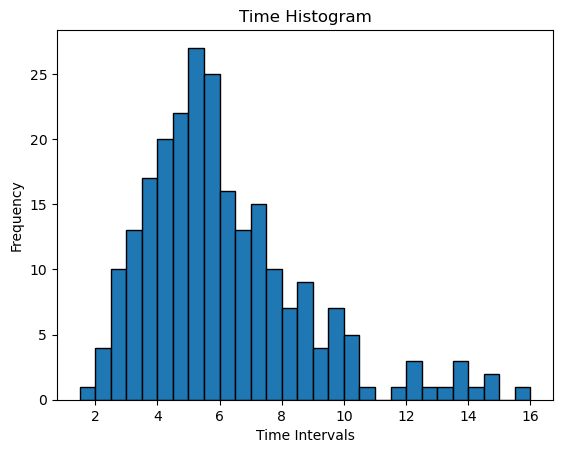

In [9]:
# Plot the histogram
plt.hist(df['TimeFractional'], bins=time_intervals1, edgecolor='black')
plt.title('Time Histogram')
plt.xlabel('Time Intervals')
plt.ylabel('Frequency')
plt.show()

In [10]:
df2 = pd.read_csv(r"C:\Users\Jimmy\Python\TransparentColor\Schema_Pranava.csv")
df2.fillna("NO", inplace=True)
df2

,Location,Video,Total Time(min)\,Curves,Dead End,Glare,Blur,Bright Spots,Short Path,2 Path,Narrow Path
0,L05,V1,1.5,NO,NO,NO,NO,NO,YES,NO,NO
1,L05,V2,1.5,NO,NO,NO,NO,NO,YES,NO,NO
2,L05,V3,1.5,NO,NO,NO,NO,NO,YES,NO,NO
3,L05,V4,1.5,NO,NO,NO,NO,NO,YES,NO,NO
4,L05,V5,1.5,NO,NO,NO,NO,NO,YES,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
232,L29,V6,6.0,NO,NO,NO,YES,NO,NO,NO,NO
233,L29,V7,4.0,NO,NO,NO,YES,NO,NO,NO,NO
234,L29,V8,4.0,NO,NO,NO,YES,NO,NO,NO,NO
235,L29,V9,5.0,NO,NO,NO,NO,NO,NO,NO,NO


In [11]:
time_statistics = df2['Total Time(min)\\'].describe()
print(time_statistics)

count    237.000000
mean       4.691983
std        1.727169
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max       15.000000
Name: Total Time(min)\, dtype: float64


In [18]:
curve_count = df2['Curves'].value_counts()
dead_end_count = df2['Dead End'].value_counts()
glare_count = df2['Glare'].value_counts()
blur_count = df2['Blur'].value_counts()
bright_spots_count = df2['Bright Spots'].value_counts()
short_path_count = df2['Short Path'].value_counts()
two_path_count = df2['2 Path'].value_counts()
narrow_path_count = df2['Narrow Path'].value_counts()
#print(curve_count)
print("Curve Issue Occurence: ", curve_count['YES']/(curve_count['NO']+curve_count['YES'])*100)
print("Dead End Issue Occurence: ", dead_end_count['YES']/(dead_end_count['NO']+dead_end_count['YES'])*100)
print("Glare Issue Occurence: ", glare_count['YES']/(glare_count['NO']+glare_count['YES'])*100)
print("Motion Blur Issue Occurence: ", blur_count['YES']/(blur_count['NO']+blur_count['YES'])*100)
print("Bright Spots Issue Occurence: ", bright_spots_count['YES']/(bright_spots_count['NO']+bright_spots_count['YES'])*100)
print("Short Path Issue Occurence: ", short_path_count['YES']/(short_path_count['NO']+short_path_count['YES'])*100)
print("Two Paths Issue Occurence: ", two_path_count['YES']/(two_path_count['NO']+two_path_count['YES'])*100)
print("Narrow Path Issue Occurence: ", narrow_path_count['YES']/(narrow_path_count['NO']+narrow_path_count['YES'])*100)

Curve Issue Occurence:  10.970464135021098
Dead End Issue Occurence:  7.59493670886076
Glare Issue Occurence:  12.236286919831224
Motion Blur Issue Occurence:  49.789029535864984
Bright Spots Issue Occurence:  2.109704641350211
Short Path Issue Occurence:  11.39240506329114
Two Paths Issue Occurence:  5.9071729957805905
Narrow Path Issue Occurence:  8.016877637130802


In [ ]:
# Check if every binary feature is 'no' for each row
features = ['Curves', 'Glare', 'Dead End', 'Blur', 
all_nos = df2[features].apply(lambda row: all(value == 'NO' for value in row), axis=1)

# Display the result
# print(all_nos)

nos_count = all_nos.value_counts()
print("Amount of videos with no issues: ", nos_count[True]/(nos_count[False]+nos_count[True])*100)

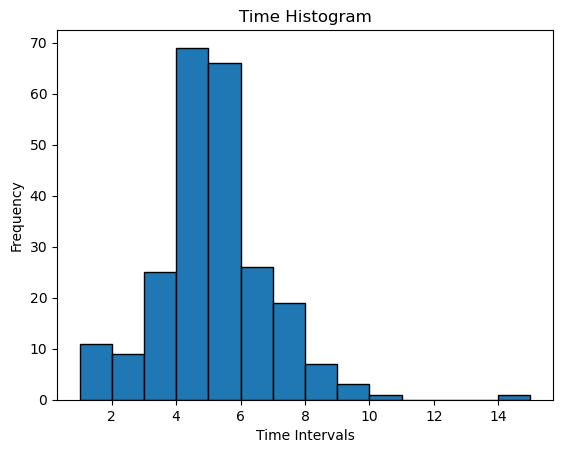

In [13]:
# Create a list of floats using a range
start = 1
end = 15
step = 1
time_intervals2 = np.arange(start, end + step, step).tolist()
# Plot the histogram
plt.hist(df2['Total Time(min)\\'], bins=time_intervals2, edgecolor='black')
plt.title('Time Histogram')
plt.xlabel('Time Intervals')
plt.ylabel('Frequency')
plt.show()

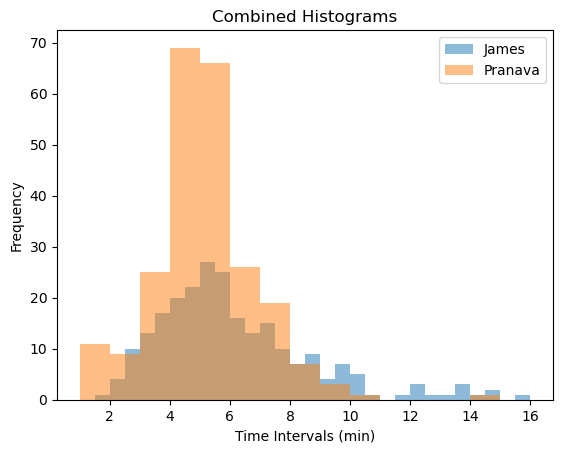

In [16]:
# Create histograms
plt.hist(df['TimeFractional'], bins=time_intervals1, alpha=0.5, label='James')
plt.hist(df2['Total Time(min)\\'], bins=time_intervals2,alpha=0.5, label='Pranava')
# Add labels and title
plt.xlabel('Time Intervals (min)')
plt.ylabel('Frequency')
plt.title('Combined Histograms')

# Add a legend
plt.legend()

# Save the plot as an image (e.g., PNG)
plt.savefig('combined_histograms.png')

# Show the plot
plt.show()